# Proyecto: Series de tiempo (Análisis de datos reales del COVID-19)

Para descargar la base de datos ingresamos a https://www.kaggle.com/ buscamos y descargamos: 'Novel Corona Virus 2019 Dataset'  

### Veremos algunas funciones útiles como:

`to_datetime()` <- Convierte valores de un dataframe al tipo 'datetime'

`.diff()` <- calcula la diferencia entre los registros actuales y anteriores en un dataframe de series de tiempo.

`.resample()` <- Se aplica a los dataframes cuyos índices son del tipo 'datetime' y permite especificar la frecuencia por la que agruparemos la información (por ejempo: Extraer información cada cierto número de días, meses, etc.)

`.groupby( pd.Grouper( key='column_name', freq='periodicidad' ) )` <- Esta función se aplica a variables del tipo "datetime" y sirve para extraer alguna medida (count, mean, sum, etc.) a una columna especificada en 'key' de acuerdo a una periodicidad específicada en 'freq'

`.bfill()` <- Asigna valor a los campos vacíos con el valor del registro anterior (backward)

`.ffill()` <- Asigna valor a los campos vacíos con el valor del registro posterior (forward)

`.fillna(val)` <- Asigna el valor 'val' a los campos vacíos

`.interpolate()` <- Asigna valores a los campos vacíos mediante interpolación 

`pd.Grouper()` <- Se usa como argumento de la función `.groupby()` y sirve para extraer información con una frecuencia específica, por lo que se aplica a variables de tipo 'datetime'

In [1]:
import pandas as pd

In [2]:
# Cargamos datos:
df = pd.read_csv('./db/COVID_19/covid_19_data.csv')
df

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
306424,306425,05/29/2021,Zaporizhia Oblast,Ukraine,2021-05-30 04:20:55,102641.0,2335.0,95289.0
306425,306426,05/29/2021,Zeeland,Netherlands,2021-05-30 04:20:55,29147.0,245.0,0.0
306426,306427,05/29/2021,Zhejiang,Mainland China,2021-05-30 04:20:55,1364.0,1.0,1324.0
306427,306428,05/29/2021,Zhytomyr Oblast,Ukraine,2021-05-30 04:20:55,87550.0,1738.0,83790.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306429 entries, 0 to 306428
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   SNo              306429 non-null  int64  
 1   ObservationDate  306429 non-null  object 
 2   Province/State   228329 non-null  object 
 3   Country/Region   306429 non-null  object 
 4   Last Update      306429 non-null  object 
 5   Confirmed        306429 non-null  float64
 6   Deaths           306429 non-null  float64
 7   Recovered        306429 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 18.7+ MB


Vemos que la variable 'ObservationDate' es del tipo 'object' y como en ralidad son fechas, las pasamos al tipo 'datetime'

In [5]:
df['ObservationDate'] = pd.to_datetime( df['ObservationDate'] )

Trabajaremos sólo con las variables '['ObservationDate', 'Country/Region' , 'Confirmed', 'Deaths','Recovered']'

In [6]:
df = df[['ObservationDate', 'Country/Region' , 'Confirmed', 'Deaths','Recovered']]
df

,ObservationDate,Country/Region,Confirmed,Deaths,Recovered
0,2020-01-22,Mainland China,1.0,0.0,0.0
1,2020-01-22,Mainland China,14.0,0.0,0.0
2,2020-01-22,Mainland China,6.0,0.0,0.0
3,2020-01-22,Mainland China,1.0,0.0,0.0
4,2020-01-22,Mainland China,0.0,0.0,0.0
...,...,...,...,...,...
306424,2021-05-29,Ukraine,102641.0,2335.0,95289.0
306425,2021-05-29,Netherlands,29147.0,245.0,0.0
306426,2021-05-29,Mainland China,1364.0,1.0,1324.0
306427,2021-05-29,Ukraine,87550.0,1738.0,83790.0


In [7]:
# Verificamos información:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306429 entries, 0 to 306428
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   ObservationDate  306429 non-null  datetime64[ns]
 1   Country/Region   306429 non-null  object        
 2   Confirmed        306429 non-null  float64       
 3   Deaths           306429 non-null  float64       
 4   Recovered        306429 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 11.7+ MB


In [8]:
# Extraemos el número de clases de datos por cada variable
df.nunique()

ObservationDate       494
Country/Region        229
Confirmed          107146
Deaths              20089
Recovered           74541
dtype: int64

In [11]:
# Mostramos la suma de registros agrupados por ['ObservationDate']
# la suma se realiza a las variables con valores numéricos:
df_time = df.groupby(['ObservationDate']).sum()
df_time

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,557.0,17.0,30.0
2020-01-23,1097.0,34.0,60.0
2020-01-24,941.0,26.0,39.0
2020-01-25,1437.0,42.0,42.0
2020-01-26,2118.0,56.0,56.0
...,...,...,...
2021-05-25,167848207.0,3485788.0,104824935.0
2021-05-26,168416423.0,3498544.0,105380748.0
2021-05-27,168970791.0,3511297.0,106078106.0


In [20]:
# Extraemos registros del 10 al 15 (.iloc) tomados de la columna ['Confirmed']:
df1 = df_time.iloc[10:15]['Confirmed']
df1

ObservationDate
2020-02-01    12038.0
2020-02-02    16787.0
2020-02-03    19881.0
2020-02-04    23892.0
2020-02-05    27636.0
Name: Confirmed, dtype: float64

In [21]:
# Extraemos registros del 12 al 17 (.iloc) tomados  de la columna ['Deaths']:
df2 = df_time.iloc[12:17]['Deaths']
df2

ObservationDate
2020-02-03    426.0
2020-02-04    492.0
2020-02-05    564.0
2020-02-06    634.0
2020-02-07    719.0
Name: Deaths, dtype: float64

In [22]:
df1-df2

ObservationDate
2020-02-01        NaN
2020-02-02        NaN
2020-02-03    19455.0
2020-02-04    23400.0
2020-02-05    27072.0
2020-02-06        NaN
2020-02-07        NaN
dtype: float64

Vemos que donde no se comparten índices, tenemos valores nulos

In [24]:
df_time

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,557.0,17.0,30.0
2020-01-23,1097.0,34.0,60.0
2020-01-24,941.0,26.0,39.0
2020-01-25,1437.0,42.0,42.0
2020-01-26,2118.0,56.0,56.0
...,...,...,...
2021-05-25,167848207.0,3485788.0,104824935.0
2021-05-26,168416423.0,3498544.0,105380748.0
2021-05-27,168970791.0,3511297.0,106078106.0


In [25]:
# .diff() calcula la diferencia entre los registros actuales y anteriores en un dataframe de series de tiempo:
df_diff = df_time.diff()
df_diff

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,NaN,NaN,NaN
2020-01-23,540.0,17.0,30.0
2020-01-24,-156.0,-8.0,-21.0
2020-01-25,496.0,16.0,3.0
2020-01-26,681.0,14.0,14.0
...,...,...,...
2021-05-25,531845.0,12752.0,577063.0
2021-05-26,568216.0,12756.0,555813.0
2021-05-27,554368.0,12753.0,697358.0


El primer renglón muestra valores nulos ya que no hay un renglón anterior con el cual medir la diferencia 

In [26]:
# Asignamos valores a los campos nulos 'NaN':
df_diff = df_diff.fillna( df_time.loc[['2020-01-22']] )
df_diff

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,557.0,17.0,30.0
2020-01-23,540.0,17.0,30.0
2020-01-24,-156.0,-8.0,-21.0
2020-01-25,496.0,16.0,3.0
2020-01-26,681.0,14.0,14.0
...,...,...,...
2021-05-25,531845.0,12752.0,577063.0
2021-05-26,568216.0,12756.0,555813.0
2021-05-27,554368.0,12753.0,697358.0


In [28]:
# Extraemos el promedio de cada variable del datframe 'df_diff'
df_diff.mean()

Confirmed    344031.497976
Deaths         7153.074899
Recovered    216883.945344
dtype: float64

## Aprovechando que los índices en 'ObservationDate' son del tipo 'datetime', podemos extraer información usando `.resample()` en donde podemos especificar la frecuencia por la que agruparemos la información (cada cierto número de días, meses, etc.)

## Esto se puede hacer cuando los índices de un dataframe son del tipo 'datetime'

In [29]:
# Calculamos la suma de registros acumulados cada 7 Dias ('7D')
df_diff.resample('7D').sum()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,5578.0,131.0,108.0
2020-01-29,18314.0,361.0,749.0
2020-02-05,20911.0,621.0,3827.0
2020-02-12,30335.0,894.0,9668.0
2020-02-19,5277.0,701.0,13553.0
...,...,...,...
2021-04-28,5642661.0,92528.0,4666430.0
2021-05-05,5331241.0,89658.0,4838711.0
2021-05-12,4541037.0,86840.0,4800529.0


In [30]:
# Calculamos la suma de registros cada acumulada cada Domingo: 'Week-Sunday' ('W-Sun')
df_diff.resample('W-Sun').sum()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-26,2118.0,56.0,56.0
2020-02-02,14669.0,306.0,420.0
2020-02-09,23364.0,544.0,2769.0
2020-02-16,31075.0,864.0,7621.0
2020-02-23,7759.0,699.0,12528.0
...,...,...,...
2021-05-02,5680889.0,93206.0,4734311.0
2021-05-09,5459865.0,90258.0,4759410.0
2021-05-16,4739560.0,86338.0,4692644.0


In [31]:
# Calculamos la suma de registros acumulados cada 2 meses ('2M')
df_diff.resample('2M').sum()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-31,9925.0,213.0,225.0
2020-03-31,847549.0,41970.0,177782.0
2020-05-31,5312292.0,330636.0,2463222.0
2020-07-31,11447648.0,306919.0,7731404.0
2020-09-30,16414647.0,335179.0,13296932.0
2020-11-30,29378664.0,456706.0,16900290.0
2021-01-31,39616638.0,764447.0,16509348.0
2021-03-31,25870333.0,580178.0,16040092.0
2021-05-31,41053864.0,717371.0,34021374.0


In [34]:
# Calculamos la suma de registros acumulados cada 12 horas ('12h')
# min_count=1 # Especifica que se realice la suma cuando al menos hay un registro.
df_cum = df_time.resample('12h').sum(min_count=1)
df_cum

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22 00:00:00,557.0,17.0,30.0
2020-01-22 12:00:00,NaN,NaN,NaN
2020-01-23 00:00:00,1097.0,34.0,60.0
2020-01-23 12:00:00,NaN,NaN,NaN
2020-01-24 00:00:00,941.0,26.0,39.0
...,...,...,...
2021-05-27 00:00:00,168970791.0,3511297.0,106078106.0
2021-05-27 12:00:00,NaN,NaN,NaN
2021-05-28 00:00:00,169470725.0,3523117.0,106633069.0


## Llenado de campos vacíos NaN

In [36]:
# 'bfill' llena los campos nulos (NaN) con el registro anterior (backward)
df_cum.bfill()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22 00:00:00,557.0,17.0,30.0
2020-01-22 12:00:00,1097.0,34.0,60.0
2020-01-23 00:00:00,1097.0,34.0,60.0
2020-01-23 12:00:00,941.0,26.0,39.0
2020-01-24 00:00:00,941.0,26.0,39.0
...,...,...,...
2021-05-27 00:00:00,168970791.0,3511297.0,106078106.0
2021-05-27 12:00:00,169470725.0,3523117.0,106633069.0
2021-05-28 00:00:00,169470725.0,3523117.0,106633069.0


In [37]:
# 'bfill' llena los campos nulos (NaN) con el registro posterior (forward)
df_cum.ffill()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22 00:00:00,557.0,17.0,30.0
2020-01-22 12:00:00,557.0,17.0,30.0
2020-01-23 00:00:00,1097.0,34.0,60.0
2020-01-23 12:00:00,1097.0,34.0,60.0
2020-01-24 00:00:00,941.0,26.0,39.0
...,...,...,...
2021-05-27 00:00:00,168970791.0,3511297.0,106078106.0
2021-05-27 12:00:00,168970791.0,3511297.0,106078106.0
2021-05-28 00:00:00,169470725.0,3523117.0,106633069.0


In [38]:
# 'bfill' llena los campos nulos (NaN) con un valor especificado
df_cum.fillna(-1000)

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22 00:00:00,557.0,17.0,30.0
2020-01-22 12:00:00,-1000.0,-1000.0,-1000.0
2020-01-23 00:00:00,1097.0,34.0,60.0
2020-01-23 12:00:00,-1000.0,-1000.0,-1000.0
2020-01-24 00:00:00,941.0,26.0,39.0
...,...,...,...
2021-05-27 00:00:00,168970791.0,3511297.0,106078106.0
2021-05-27 12:00:00,-1000.0,-1000.0,-1000.0
2021-05-28 00:00:00,169470725.0,3523117.0,106633069.0


In [39]:
# Podemos interpolar los datos faltantes
# (Esto se hace cuando los registros preservan alguna continuidad)
df_cum = df_cum.interpolate()
df_cum

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22 00:00:00,557.0,17.0,30.0
2020-01-22 12:00:00,827.0,25.5,45.0
2020-01-23 00:00:00,1097.0,34.0,60.0
2020-01-23 12:00:00,1019.0,30.0,49.5
2020-01-24 00:00:00,941.0,26.0,39.0
...,...,...,...
2021-05-27 00:00:00,168970791.0,3511297.0,106078106.0
2021-05-27 12:00:00,169220758.0,3517207.0,106355587.5
2021-05-28 00:00:00,169470725.0,3523117.0,106633069.0


In [40]:
# Definimos una columna para establecer la taza de supervivencia al covid-19

df_cum['rate'] = 1 - df_cum['Deaths']/df_cum['Confirmed']
df_cum

,Confirmed,Deaths,Recovered,rate
ObservationDate,,,,
2020-01-22 00:00:00,557.0,17.0,30.0,0.969479
2020-01-22 12:00:00,827.0,25.5,45.0,0.969166
2020-01-23 00:00:00,1097.0,34.0,60.0,0.969006
2020-01-23 12:00:00,1019.0,30.0,49.5,0.970559
2020-01-24 00:00:00,941.0,26.0,39.0,0.972370
...,...,...,...,...
2021-05-27 00:00:00,168970791.0,3511297.0,106078106.0,0.979220
2021-05-27 12:00:00,169220758.0,3517207.0,106355587.5,0.979215
2021-05-28 00:00:00,169470725.0,3523117.0,106633069.0,0.979211


In [41]:
# Resetemos los índices, por lo que 'ObservationDate' se convierte en una columna:

df_cum = df_cum.reset_index()
df_cum

,ObservationDate,Confirmed,Deaths,Recovered,rate
0,2020-01-22 00:00:00,557.0,17.0,30.0,0.969479
1,2020-01-22 12:00:00,827.0,25.5,45.0,0.969166
2,2020-01-23 00:00:00,1097.0,34.0,60.0,0.969006
3,2020-01-23 12:00:00,1019.0,30.0,49.5,0.970559
4,2020-01-24 00:00:00,941.0,26.0,39.0,0.972370
...,...,...,...,...,...
982,2021-05-27 00:00:00,168970791.0,3511297.0,106078106.0,0.979220
983,2021-05-27 12:00:00,169220758.0,3517207.0,106355587.5,0.979215
984,2021-05-28 00:00:00,169470725.0,3523117.0,106633069.0,0.979211
985,2021-05-28 12:00:00,169711142.5,3528368.0,106886869.0,0.979210


## Agrupaciones especiales para series de tiempo: `pd.Grouper()`

In [43]:
df_cum

,ObservationDate,Confirmed,Deaths,Recovered,rate
0,2020-01-22 00:00:00,557.0,17.0,30.0,0.969479
1,2020-01-22 12:00:00,827.0,25.5,45.0,0.969166
2,2020-01-23 00:00:00,1097.0,34.0,60.0,0.969006
3,2020-01-23 12:00:00,1019.0,30.0,49.5,0.970559
4,2020-01-24 00:00:00,941.0,26.0,39.0,0.972370
...,...,...,...,...,...
982,2021-05-27 00:00:00,168970791.0,3511297.0,106078106.0,0.979220
983,2021-05-27 12:00:00,169220758.0,3517207.0,106355587.5,0.979215
984,2021-05-28 00:00:00,169470725.0,3523117.0,106633069.0,0.979211
985,2021-05-28 12:00:00,169711142.5,3528368.0,106886869.0,0.979210


In [42]:
# Cuando queremos agrupar un dataframe con respecto a una variable de tipo 'datetime'
# podemos usar la función 'pd.Grouper' que nos permite elegir alguna frecuencia para mostrar los datos,
# por ejemplo:
# freq='7d' <- registro por cada 7 dias 
# freq='1M' <- registro por cada 1 mes 
# freq='2Y' <- registro por cada 2 años 

# Obtenemos el promedio de taza de supervivencia agrupada por 'ObservationDate' con una frecuencia mensual.
superviv = df_cum.groupby( pd.Grouper( key='ObservationDate', freq='1M' ) )[['rate']].mean()
superviv

,rate
ObservationDate,
2020-01-31,0.974241
2020-02-29,0.973562
2020-03-31,0.960046
2020-04-30,0.935326
2020-05-31,0.933192
2020-06-30,0.945718
2020-07-31,0.957081
2020-08-31,0.964339
2020-09-30,0.968524


<AxesSubplot:xlabel='ObservationDate'>

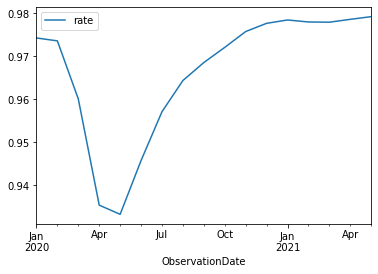

In [44]:
# Graficamos la evolución de la tasda de supervivencia:
superviv.plot()


<AxesSubplot:xlabel='ObservationDate'>

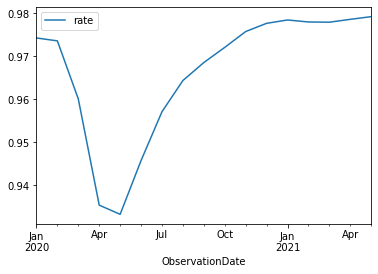

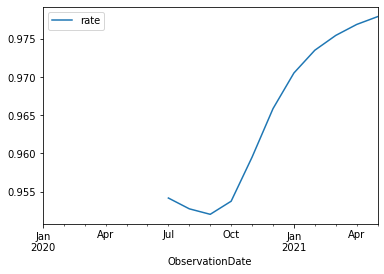

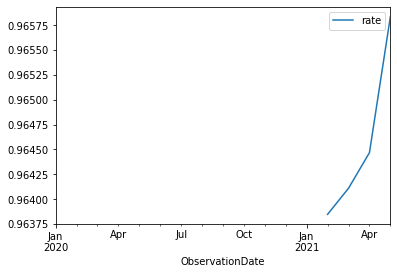

In [45]:
superviv.plot()
superviv.rolling(window=7).mean().plot()
superviv.rolling(window=14).mean().plot()